Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import glob

In [3]:
glob.glob(r'C:\Aabid Study\LEARNING DATA SCIENCE\Projects\S&P Data Analysis\S&P_resources\individual_stocks_5yr/*csv')

['C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\

Importing the data of Apple, Amazon, Google, Microsoft

In [4]:
company_list = [r'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
                r'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
                r'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
                r'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv',
                 ]

In [5]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
data_list = []
for file in company_list:
    current_df = pd.read_csv(file)
    data_list.append(current_df)

all_data = pd.concat(data_list, ignore_index=True)

In [13]:
all_data.shape

(4752, 7)

In [14]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [15]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

What was the change in price of the stock overtime?

In [16]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [19]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

converting date column from string to datetime

In [21]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [22]:
tech_list = all_data['Name'].unique()

In [23]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

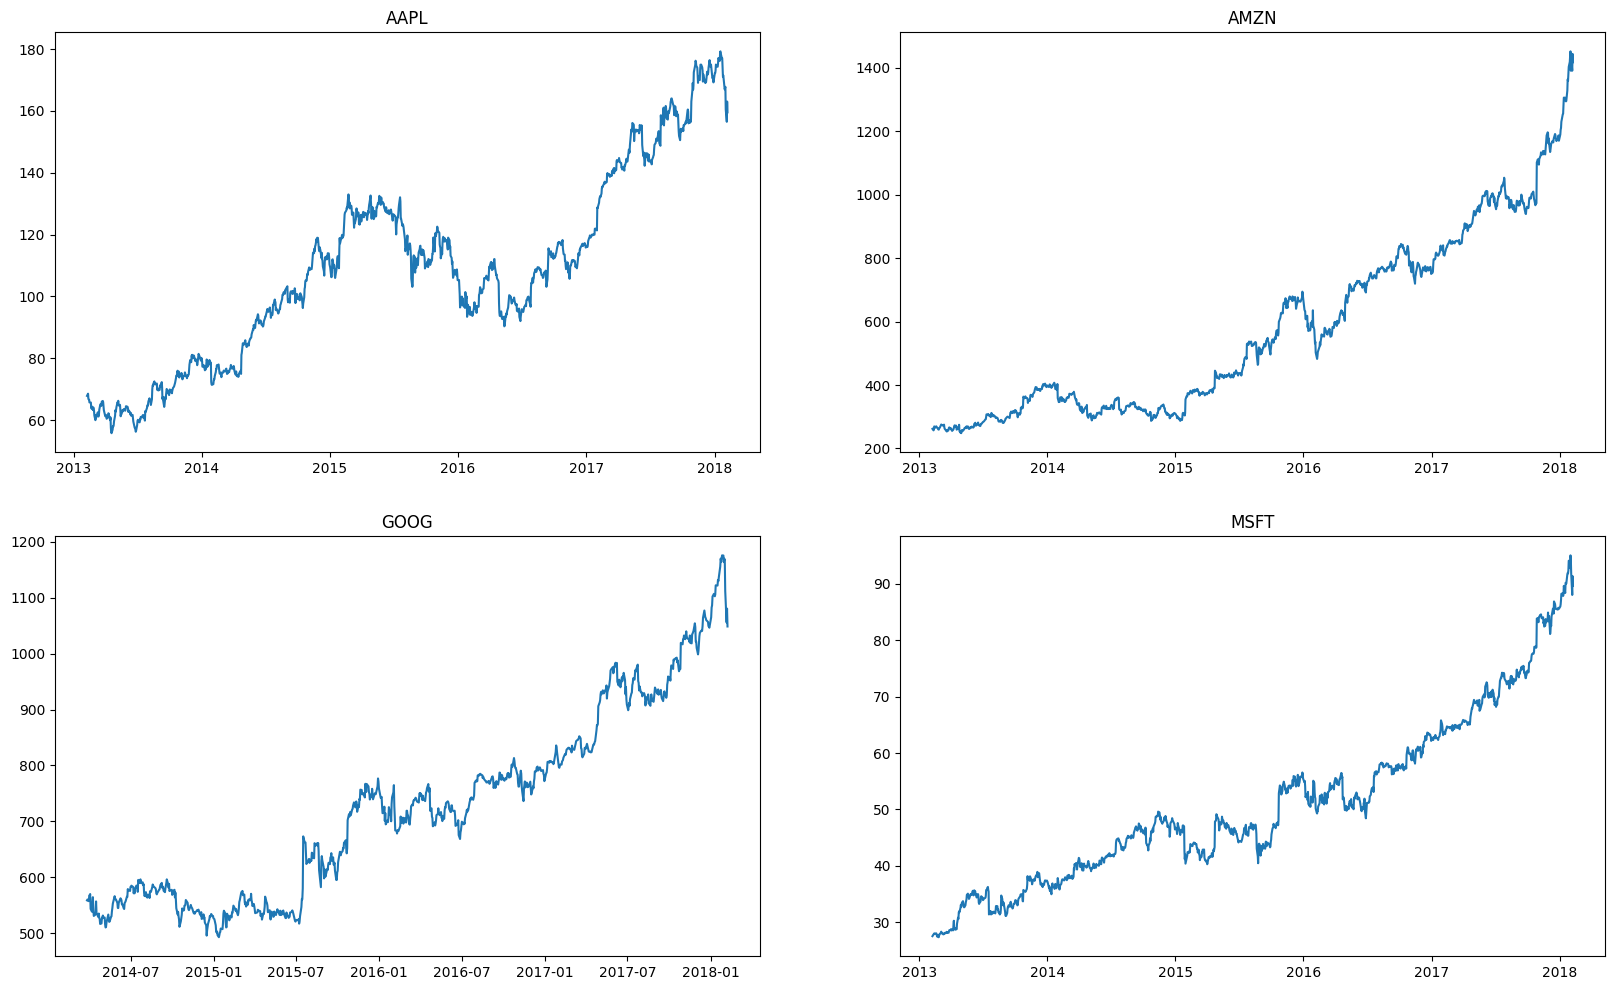

In [28]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name']== company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

What was the moving average of the various stock?

In [29]:
all_data['close'].head(15)

0     67.8542
1     68.5614
2     66.8428
3     66.7156
4     66.6556
5     65.7371
6     65.7128
7     64.1214
8     63.7228
9     64.4014
10    63.2571
11    64.1385
12    63.5099
13    63.0571
14    61.4957
Name: close, dtype: float64

In [30]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [31]:
new_data = all_data.copy()

In [32]:
ma_day = [10,20,50]
for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(window= ma).mean()

In [33]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [34]:
new_data.set_index('date', inplace=True)

In [35]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


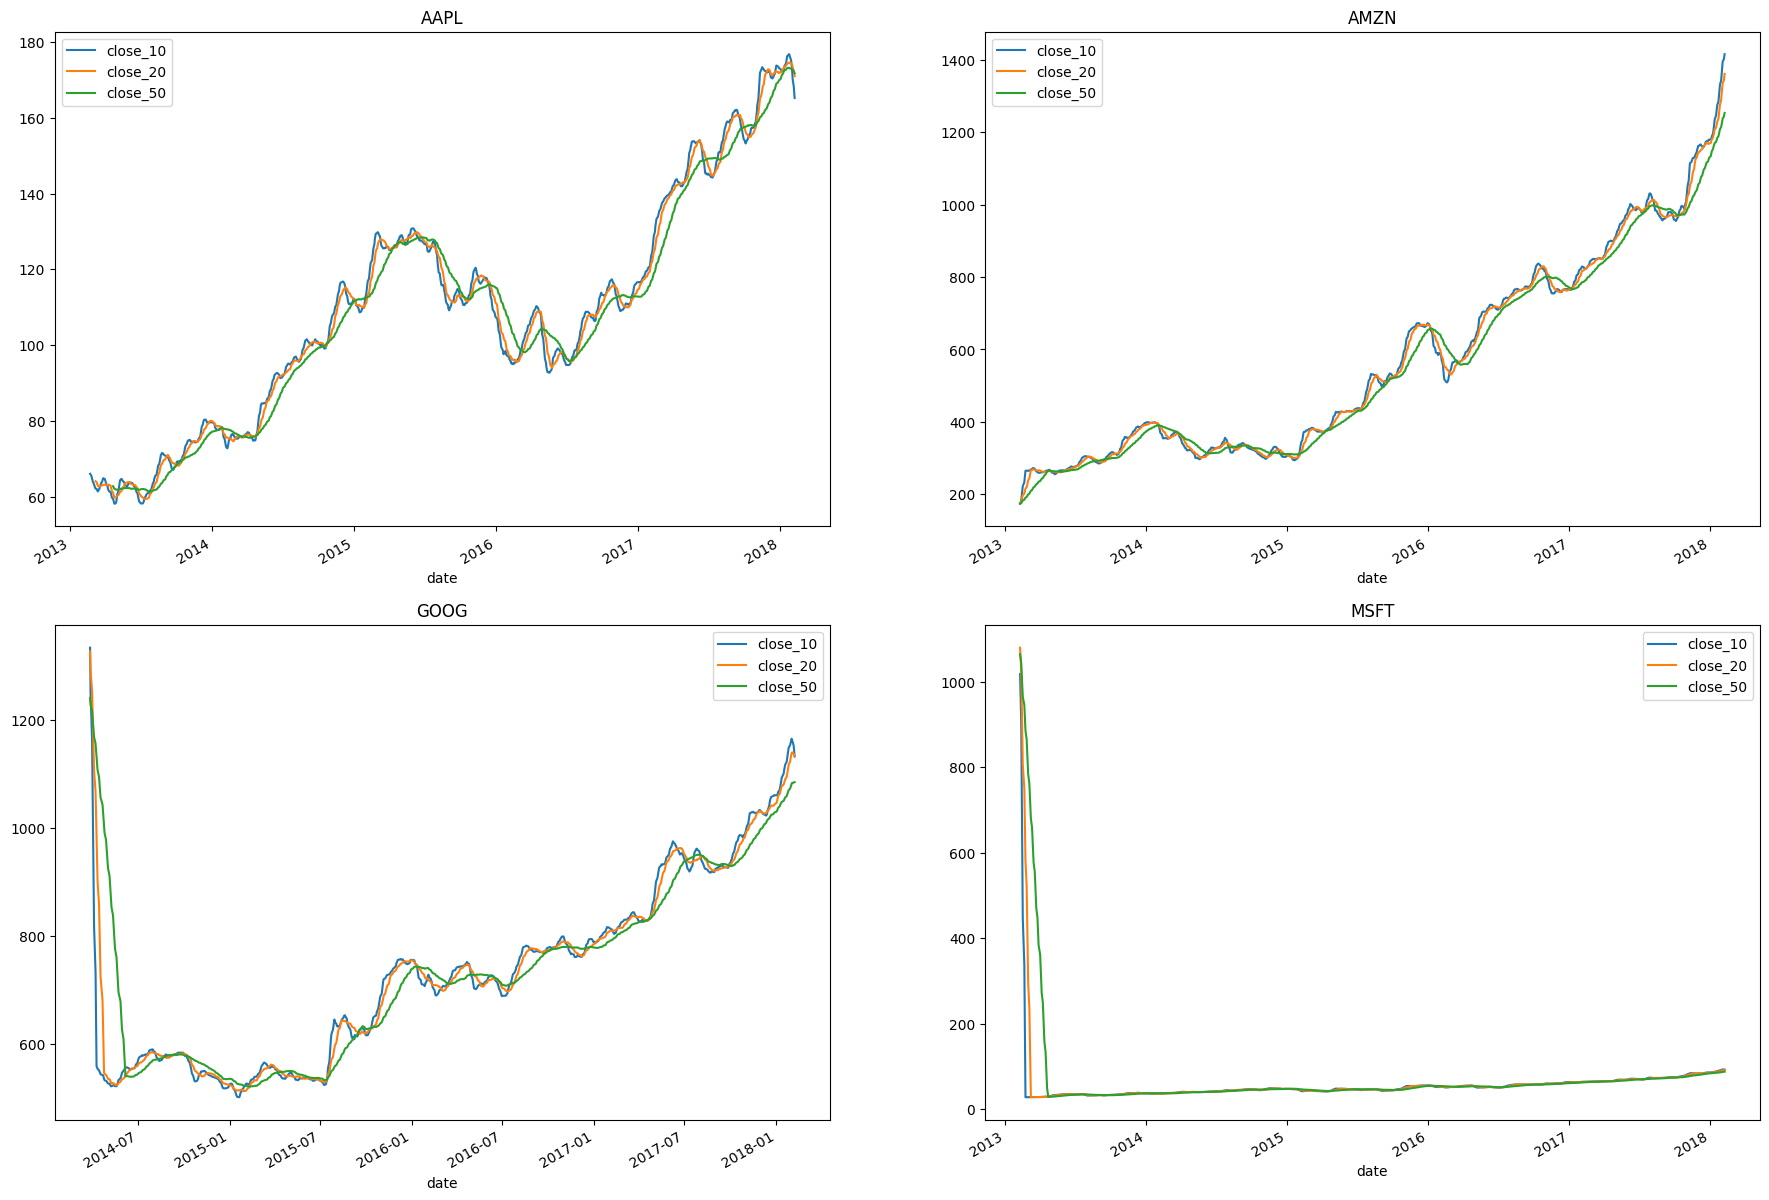

In [41]:
plt.figure(figsize=(22,16))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name']== company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax= plt.gca())
    plt.title(company)

Analysis the closing price change in Apple Stock

In [55]:
apple_df = pd.read_csv(r'C:\\Aabid Study\\LEARNING DATA SCIENCE\\Projects\\S&P Data Analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv')

In [56]:
apple_df.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [57]:
apple_df['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [58]:
apple_df['Daily return(in %)'] = apple_df['close'].pct_change()*100

In [59]:
px.line(apple_df, x = 'date', y = 'Daily return(in %)')

Performing resampling analysis of closing price of Apple Stock

In [60]:
apple_df['date'] = pd.to_datetime(apple_df['date'])

In [62]:
apple_df.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [63]:
apple_df.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [64]:
apple_df.set_index('date', inplace=True)

In [65]:
apple_df.head(4)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [69]:
apple_df['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

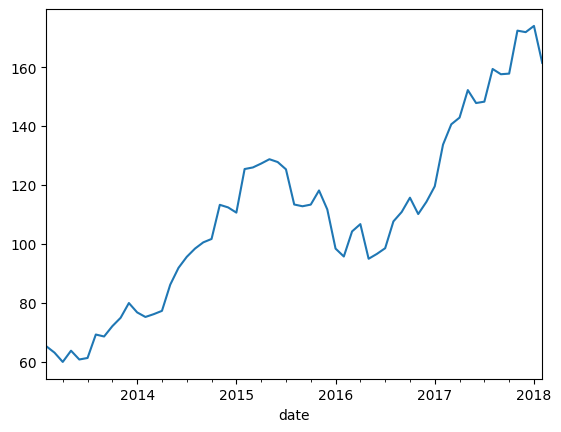

In [67]:
apple_df['close'].resample('M').mean().plot()

In [70]:
apple_df['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

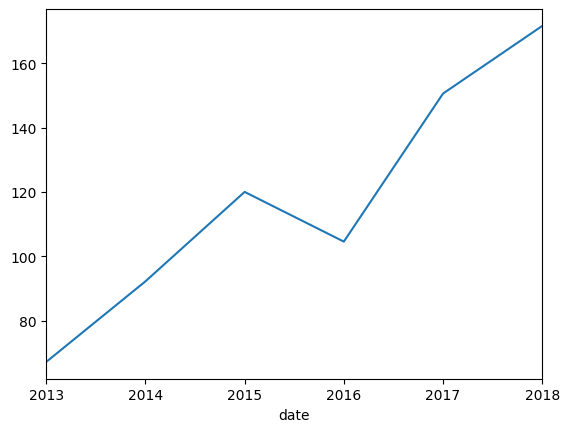

In [68]:
apple_df['close'].resample('Y').mean().plot()

In [71]:
apple_df['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

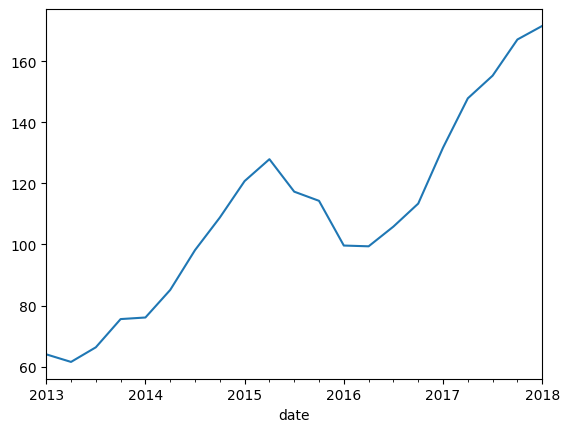

In [72]:
apple_df['close'].resample('Q').mean().plot()

Checking if the closing prices of these tech companies(Apple, Amazon, Google, Microsoft) are correlated or not!

In [73]:
company_list

['C:\\\\Aabid Study\\\\LEARNING DATA SCIENCE\\\\Projects\\\\S&P Data Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Aabid Study\\\\LEARNING DATA SCIENCE\\\\Projects\\\\S&P Data Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Aabid Study\\\\LEARNING DATA SCIENCE\\\\Projects\\\\S&P Data Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Aabid Study\\\\LEARNING DATA SCIENCE\\\\Projects\\\\S&P Data Analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [75]:
Apple = pd.read_csv(company_list[0])
Amazon = pd.read_csv(company_list[1])
Google = pd.read_csv(company_list[2])
Microsoft = pd.read_csv(company_list[3])

In [76]:
closing_price = pd.DataFrame()

In [77]:
closing_price['Apple_close'] = Apple['close']
closing_price['Amazon_close'] = Amazon['close']
closing_price['Google_close'] = Google['close']
closing_price['Microsoft_close'] = Microsoft['close']

In [78]:
closing_price

,Apple_close,Amazon_close,Google_close,Microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


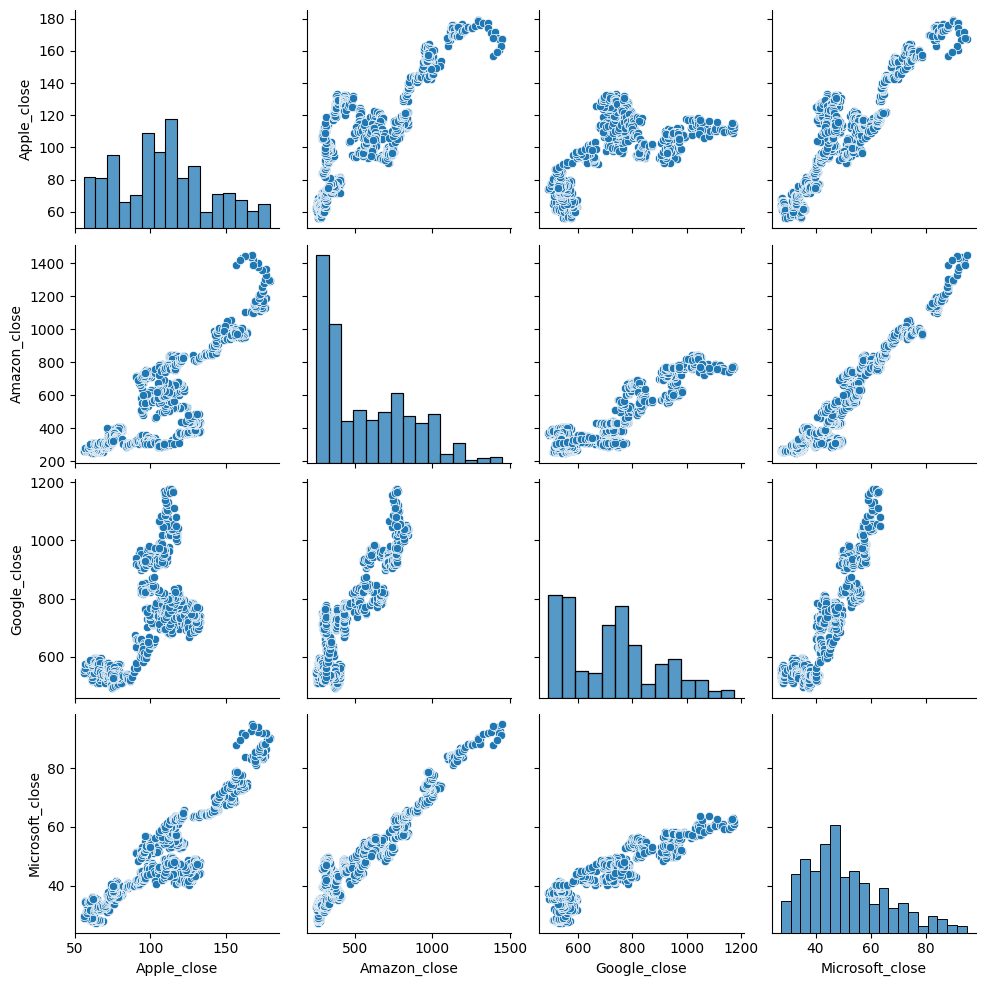

In [79]:
sns.pairplot(closing_price)

In [80]:
closing_price.corr()

,Apple_close,Amazon_close,Google_close,Microsoft_close
Apple_close,1.000000,0.819078,0.640522,0.899689
Amazon_close,0.819078,1.000000,0.888456,0.955977
Google_close,0.640522,0.888456,1.000000,0.907011
Microsoft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

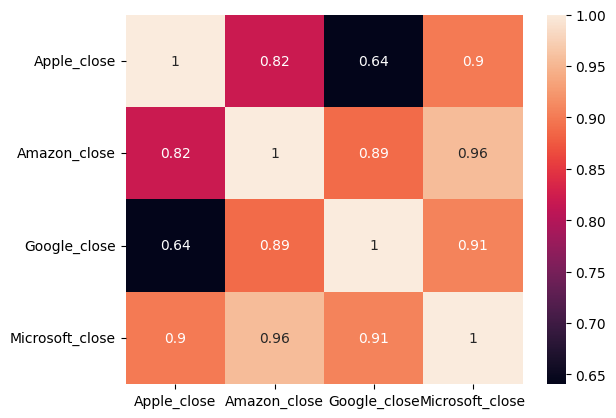

In [82]:
sns.heatmap(closing_price.corr(), annot=True)

Analysis whether daily change in closing price of stocks or daily returns in stock are co-related or not !

In [83]:
closing_price['Apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: Apple_close, Length: 1259, dtype: float64

In [84]:
closing_price['Apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: Apple_close, Length: 1259, dtype: float64

In [85]:
(closing_price['Apple_close'] - closing_price['Apple_close'].shift(1))/closing_price['Apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: Apple_close, Length: 1259, dtype: float64

In [86]:
for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [87]:
closing_price

,Apple_close,Amazon_close,Google_close,Microsoft_close,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [88]:
closing_price.columns

Index(['Apple_close', 'Amazon_close', 'Google_close', 'Microsoft_close',
       'Apple_close_pct_change', 'Amazon_close_pct_change',
       'Google_close_pct_change', 'Microsoft_close_pct_change'],
      dtype='object')

In [89]:
closing_p = closing_price[['Apple_close_pct_change', 'Amazon_close_pct_change',
       'Google_close_pct_change', 'Microsoft_close_pct_change']]

In [90]:
closing_p

,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


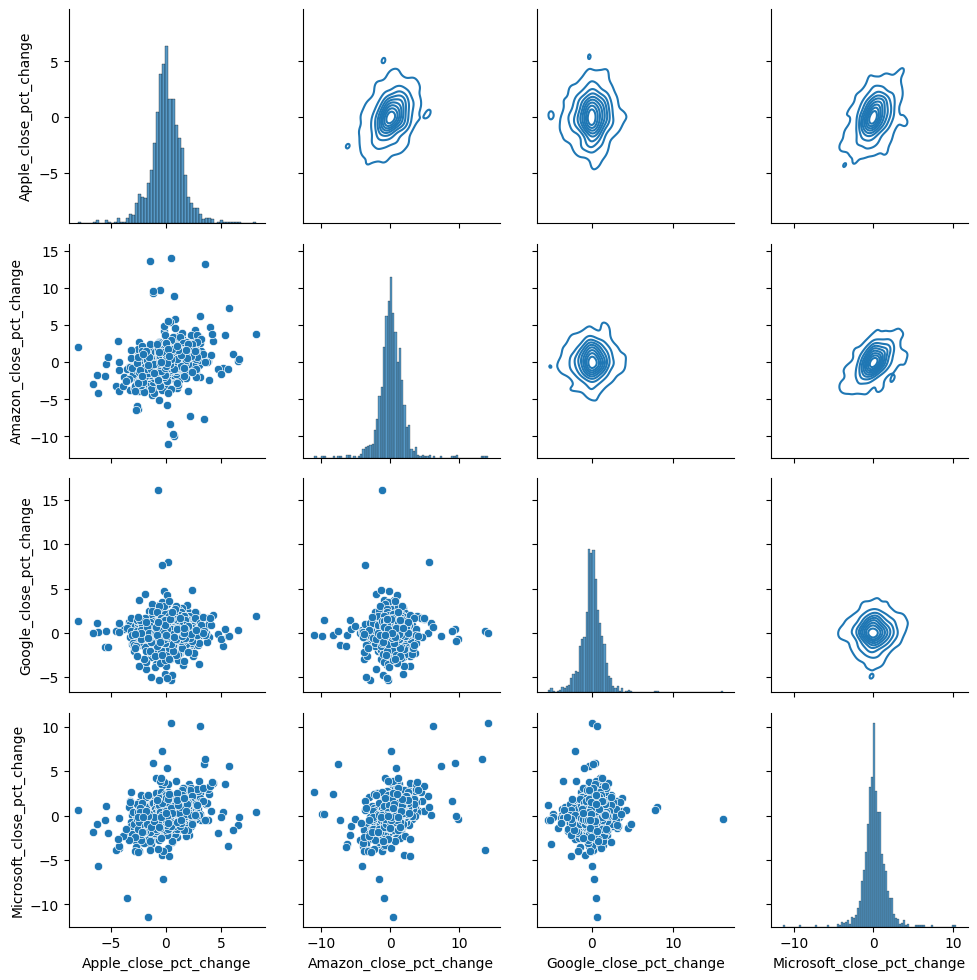

In [93]:
g = sns.PairGrid(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
